In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [1]:
from function_def import replace_outliers_with_median, replace_outliers_with_mean, remove_outliers,new_quality_value, classificator, plot_boxplots, plot_boxplots_comparision, plot_bar_chart_df, plot_result, classificator_evo, classification_evo, plot_result_evo, plot_bar_chart_df_evo, trova_max

## DATA RAPRESENTETION

In [10]:
wine_dataframe = pd.read_csv('restore_winedata.csv')
result=pd.DataFrame()
data=wine_dataframe.copy()
data.shape

(1599, 12)

In [11]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.51,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
wine_dataframe.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

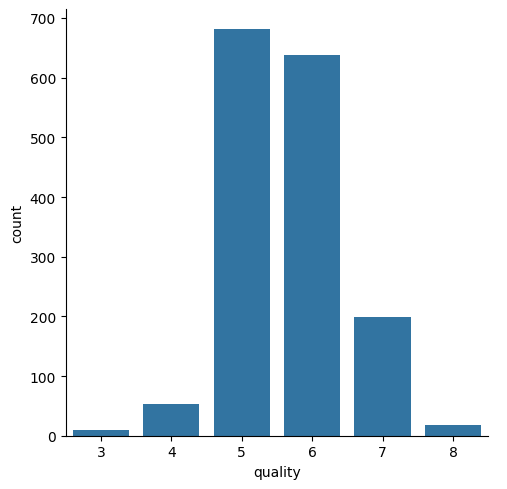

In [13]:
sns.catplot(x='quality',data=data, kind='count')  #counting and rappresenting different label
plt.show()

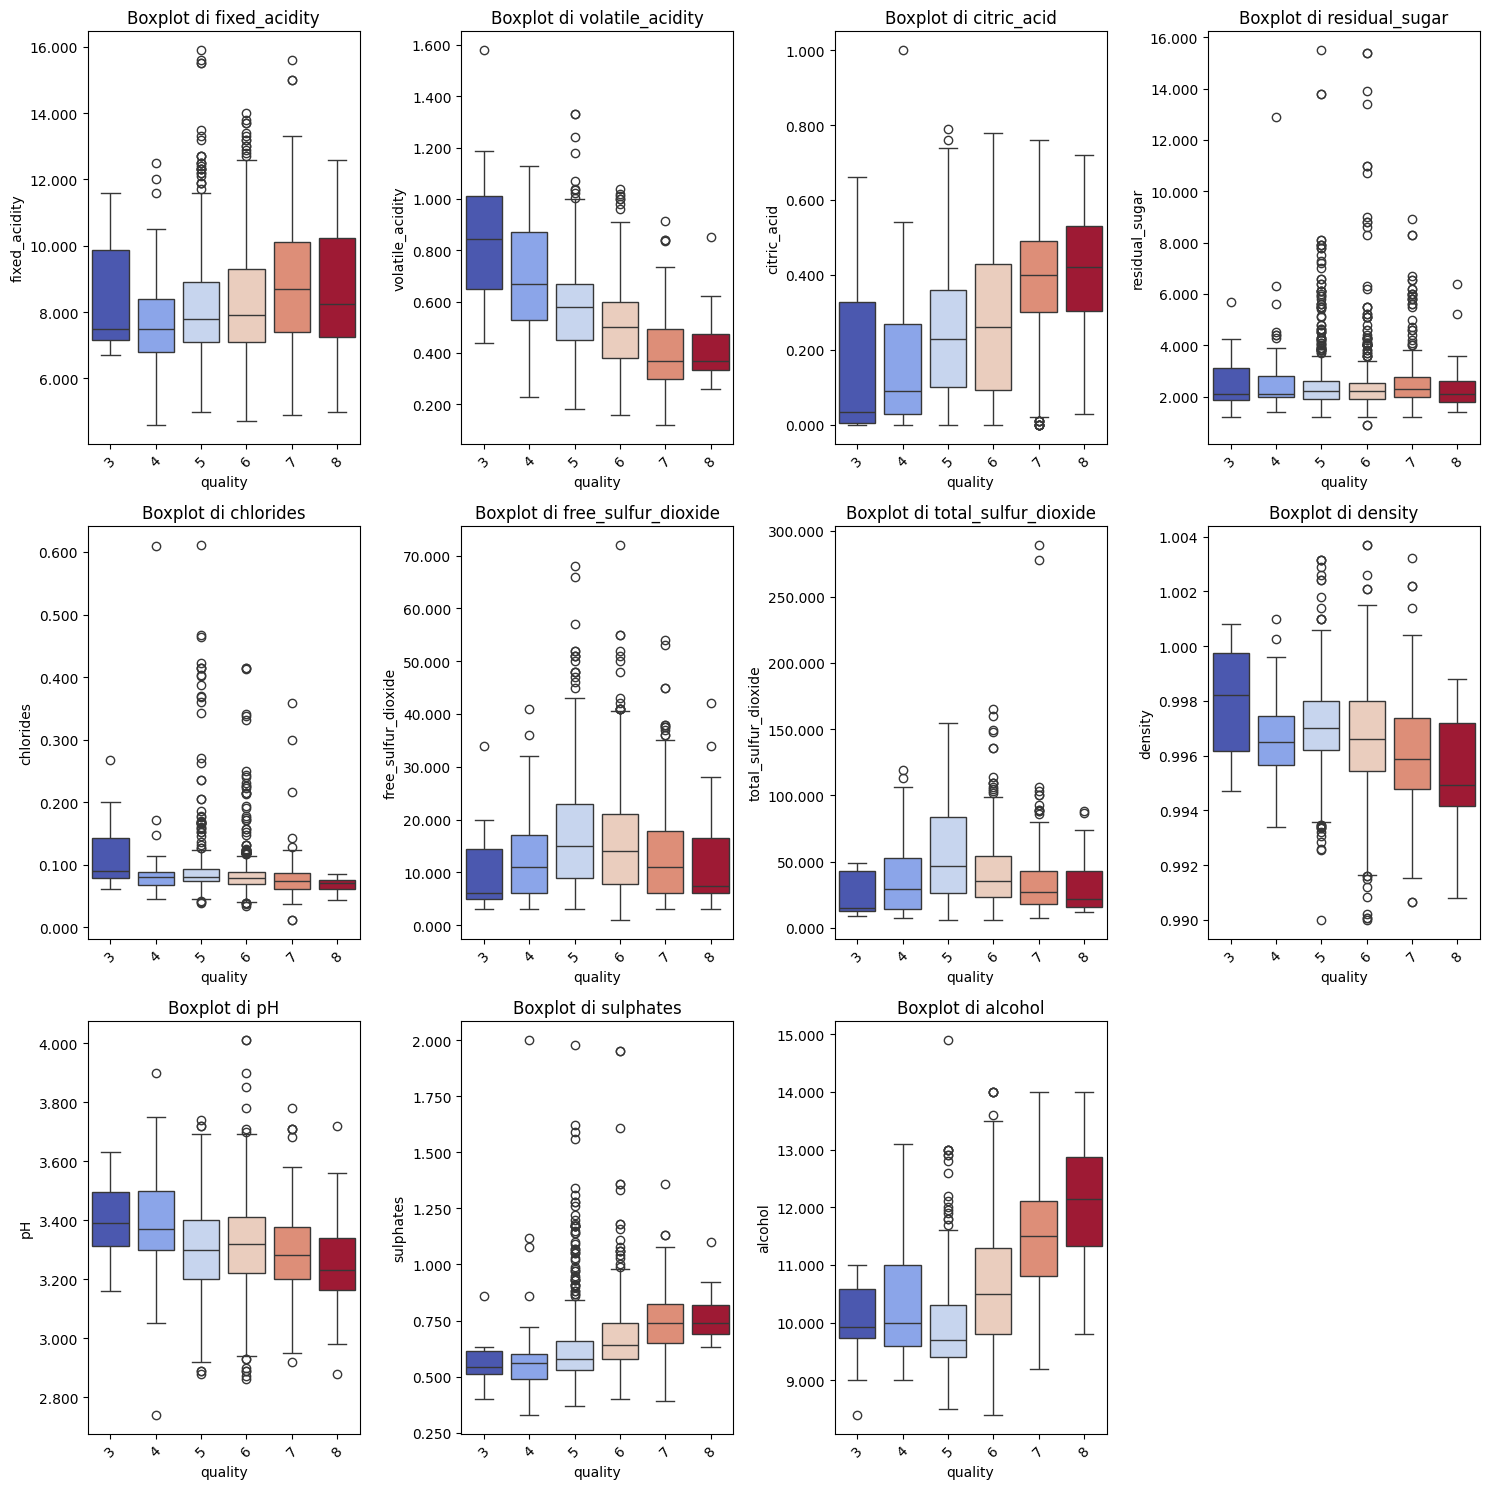

In [59]:
plot_boxplots(data)

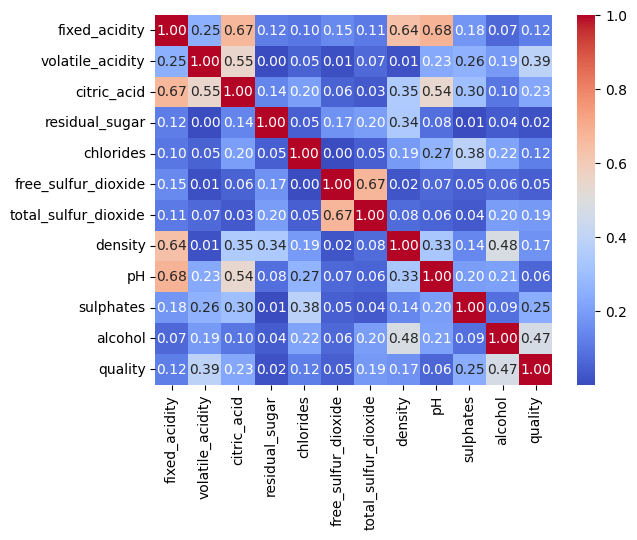

In [14]:
corr_matrix = data.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [15]:
wine_feature=corr_matrix['quality']
wine_feature.drop(['quality'], inplace=True)

moderate_corr=[]
weak_corr=[]
no_corr=[]

for i in range(len(wine_feature)):
    if wine_feature.iloc[i] > 0.389 :
        moderate_corr.append(wine_feature.index[i])
    elif wine_feature.iloc[i] > 0.189 :
        weak_corr.append(wine_feature.index[i])
    else:
        no_corr.append(wine_feature.index[i])

print('Feature with moderate correlation with quality:',moderate_corr)
print('Feature with weak correlation with quality:',weak_corr)
print('Feature with no correlation with quality:',no_corr)

Feature with moderate correlation with quality: ['volatile_acidity', 'alcohol']
Feature with weak correlation with quality: ['citric_acid', 'sulphates']
Feature with no correlation with quality: ['fixed_acidity', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH']


## DATA CLEANING

In [16]:
data_clean=replace_outliers_with_median(data)
data_clean.shape

(1599, 12)

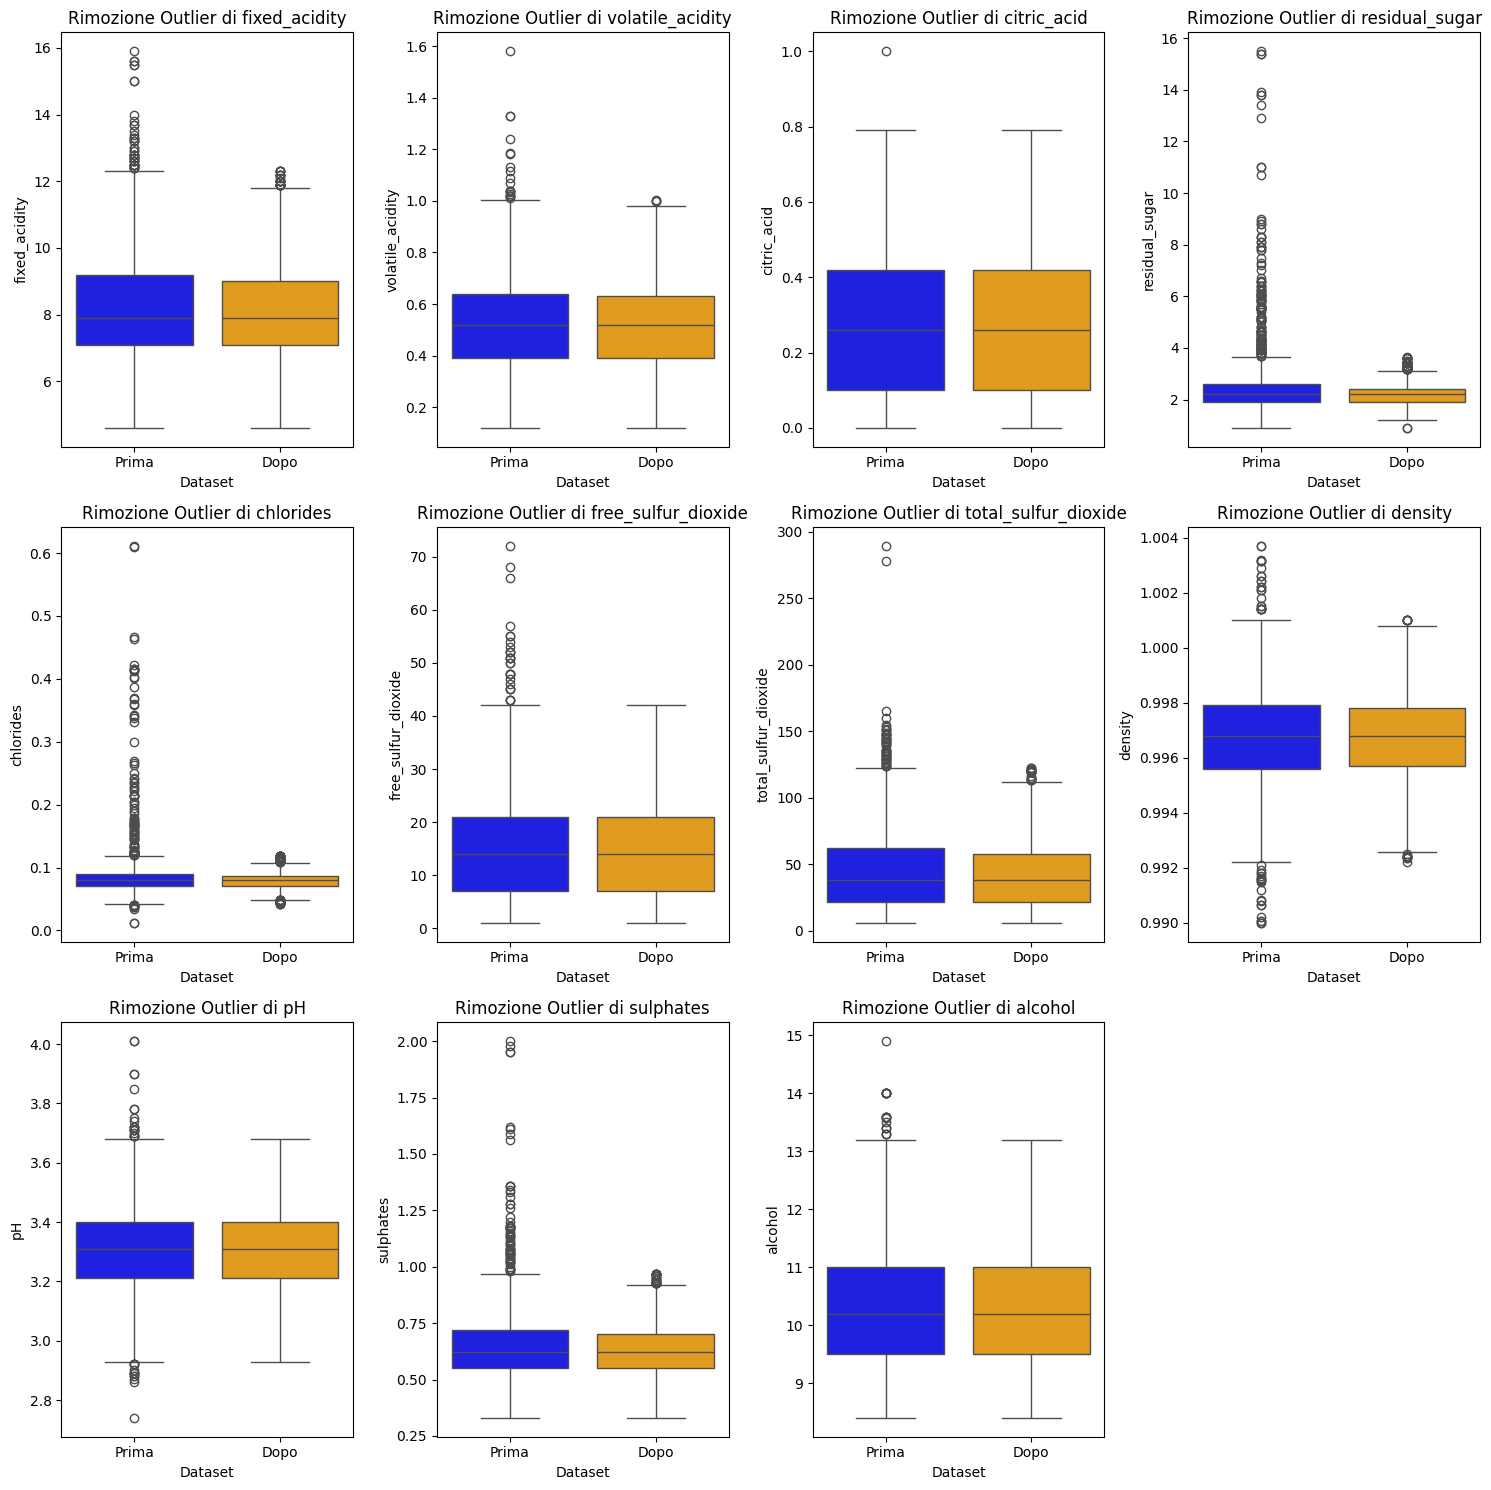

In [17]:
plot_boxplots_comparision(data,data_clean)

In [18]:
relevant=wine_dataframe.drop(columns=no_corr)
relevant_clean=replace_outliers_with_median(relevant)
relevant_clean.shape

(1599, 5)

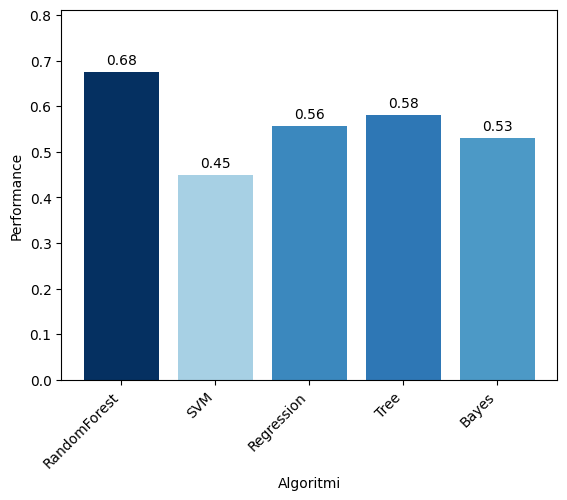

In [19]:
result['Data']=classificator(data,'quality')
plot_bar_chart_df(result['Data'])

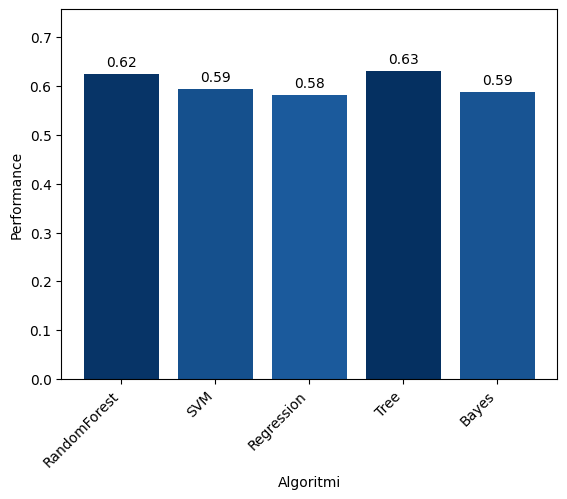

In [20]:
result['Relevant']=classificator(relevant,'quality')
plot_bar_chart_df(result['Relevant'])

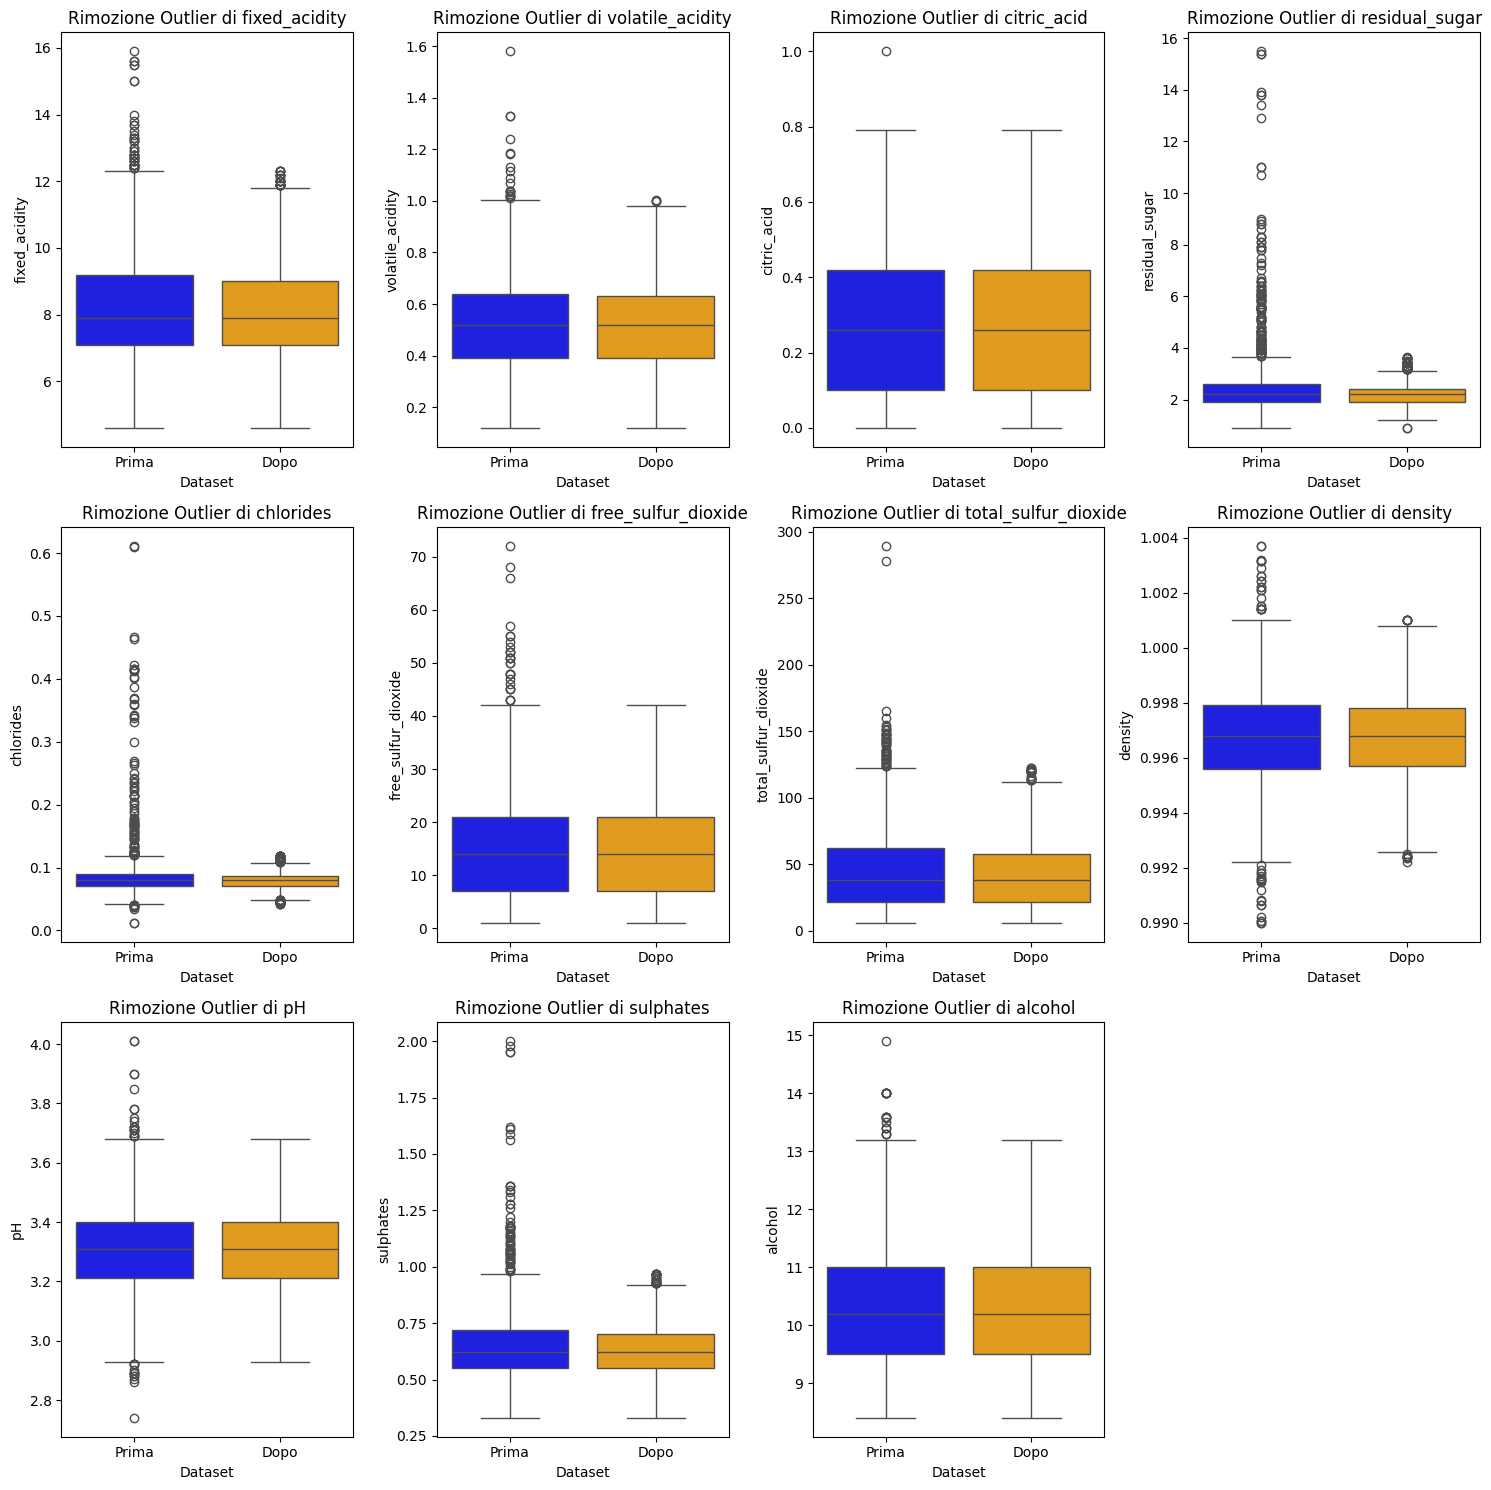

In [21]:
plot_boxplots_comparision(data,data_clean)

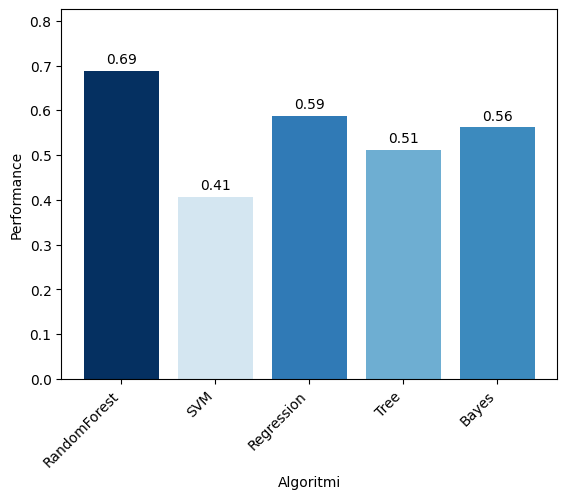

In [22]:
result['Data_Clean']=classificator(data_clean,'quality')
plot_bar_chart_df(result['Data_Clean'])

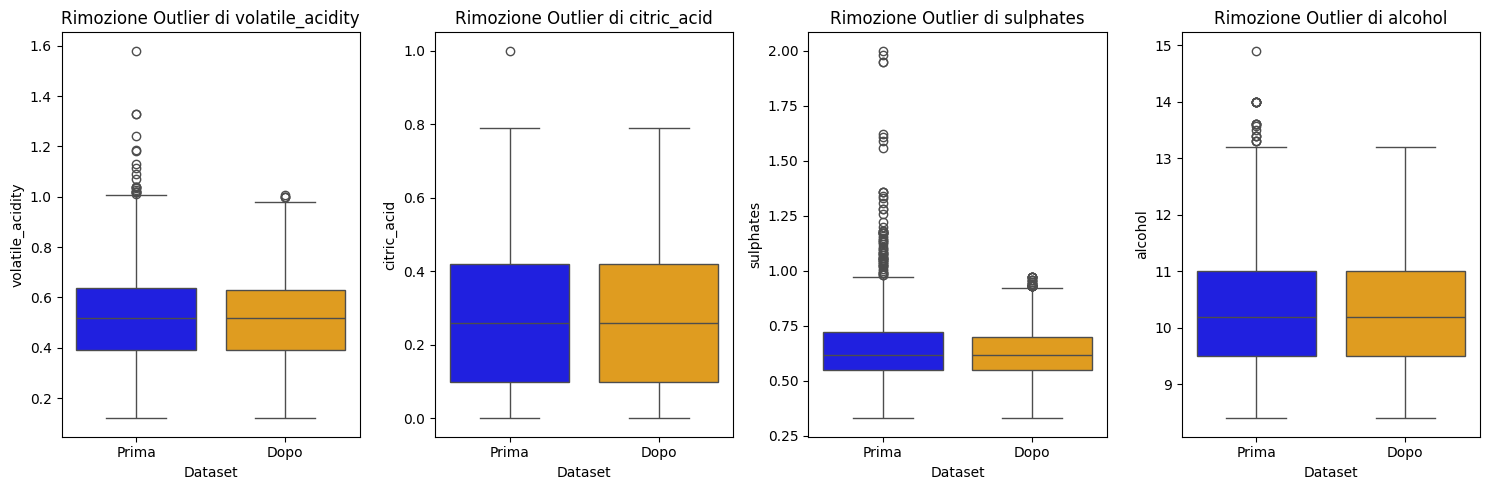

In [23]:
plot_boxplots_comparision(relevant,relevant_clean)

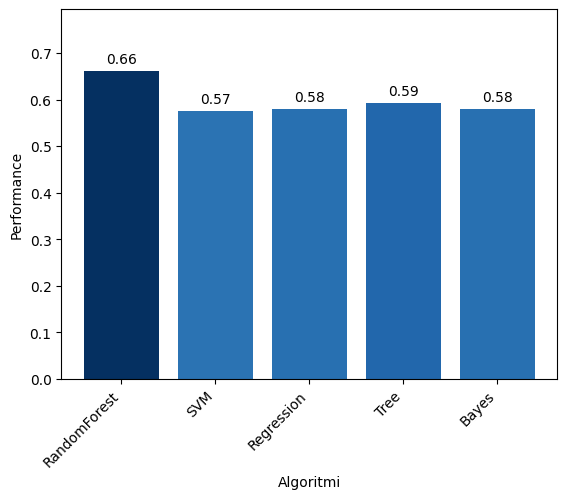

In [24]:
result['Relevant_Clean']=classificator(relevant_clean, 'quality')
plot_bar_chart_df(result['Relevant_Clean'])

In [25]:
data_clean_remove=remove_outliers(data)
print(data_clean_remove.shape)

(1188, 12)


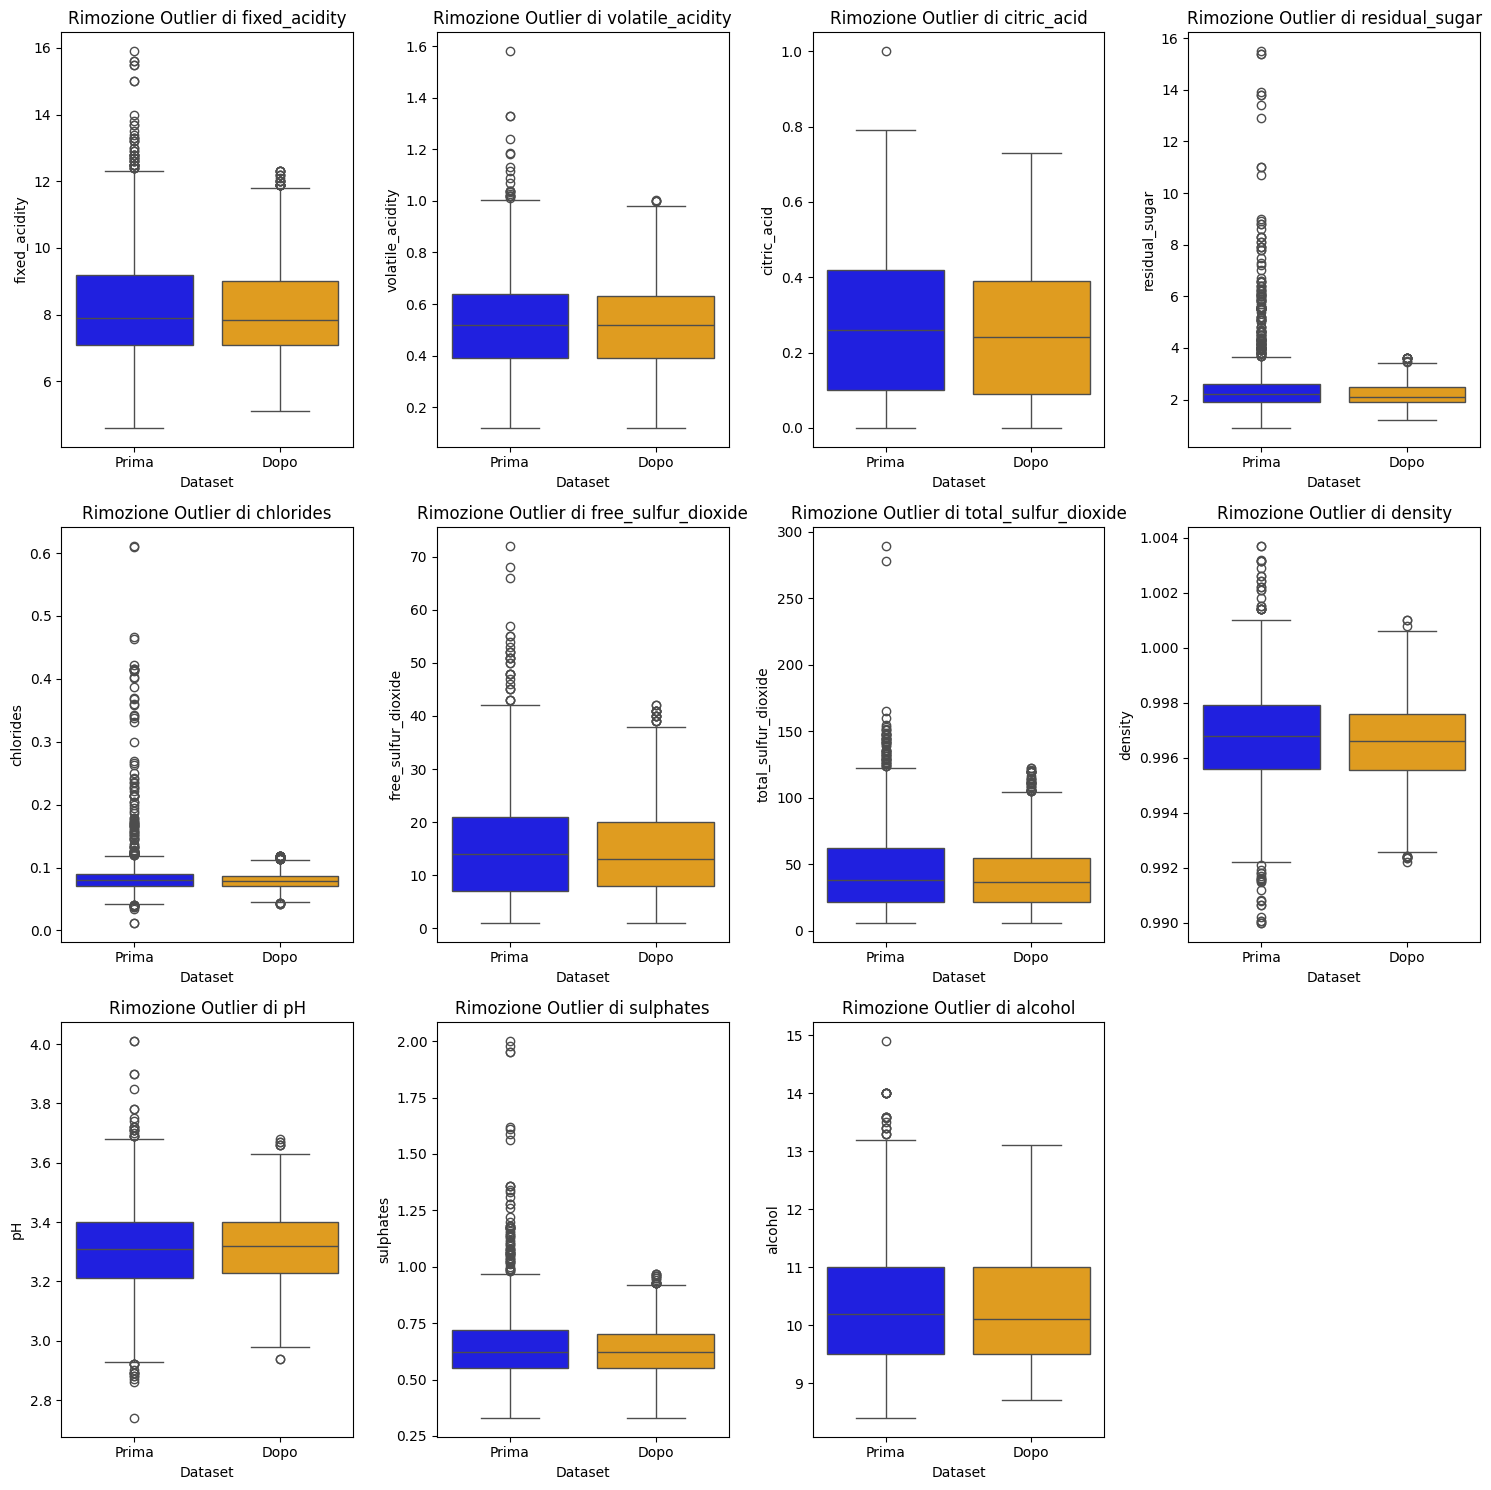

In [26]:
plot_boxplots_comparision(data,data_clean_remove)

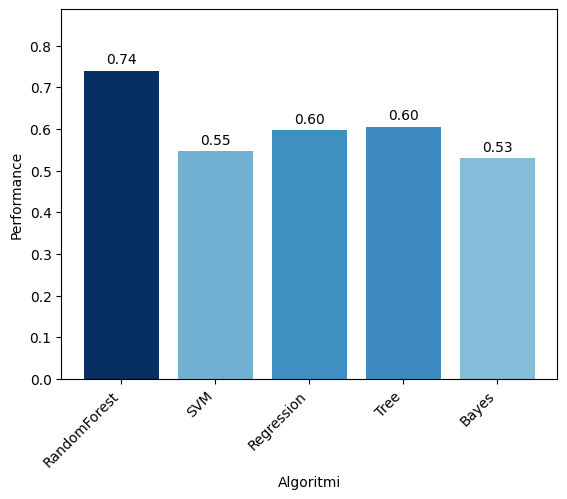

In [27]:
result['Data_Remove']=classificator(data_clean_remove,'quality')
plot_bar_chart_df(result['Data_Remove'])

In [28]:
relevant_clean_remove=remove_outliers(relevant)
print(relevant_clean_remove.shape)

(1496, 5)


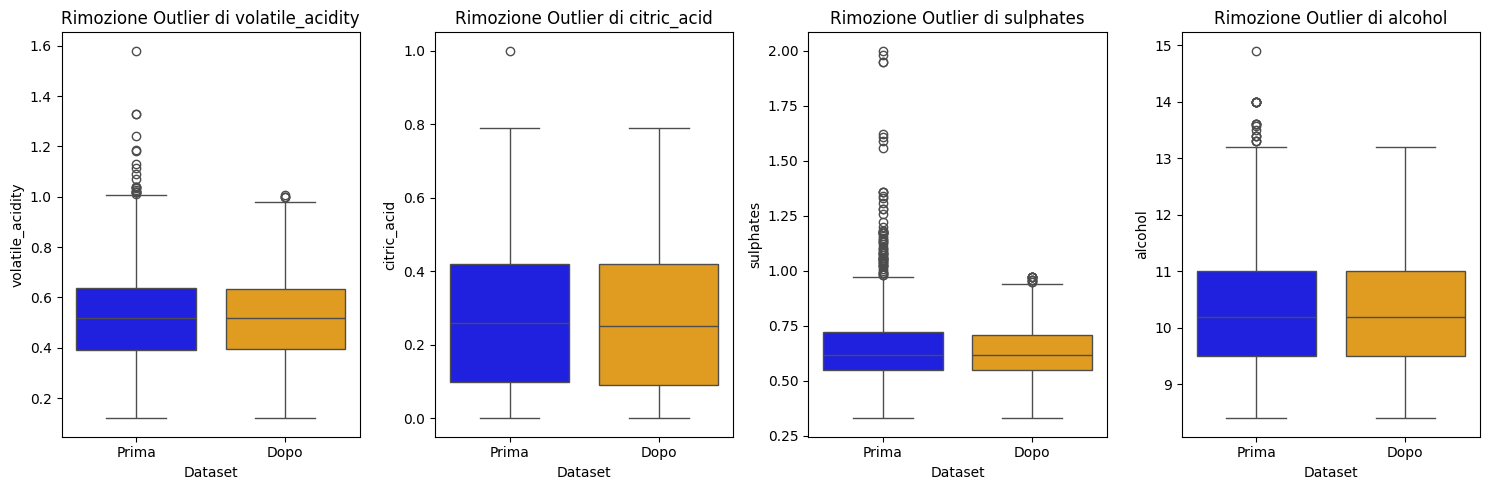

In [29]:
plot_boxplots_comparision(relevant,relevant_clean_remove)

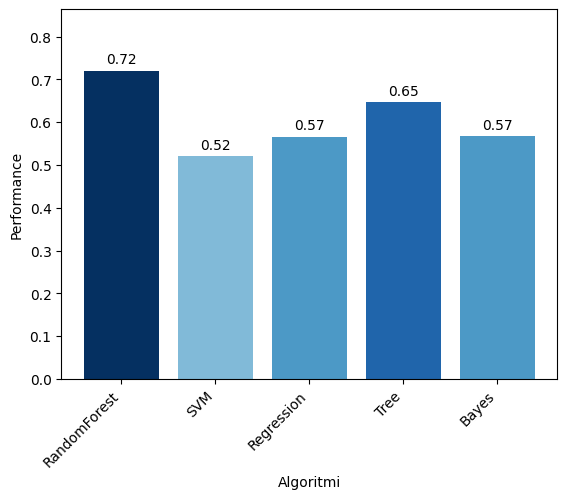

In [30]:
result['Relevant_Remove']=classificator(relevant_clean_remove, 'quality')
plot_bar_chart_df(result['Relevant_Remove'])

## RIDUZIONE DEI TIPI DI QUALITY  (3/4=0, 5/6=1, 7/8=2)

In [31]:
new_data=new_quality_value(data)

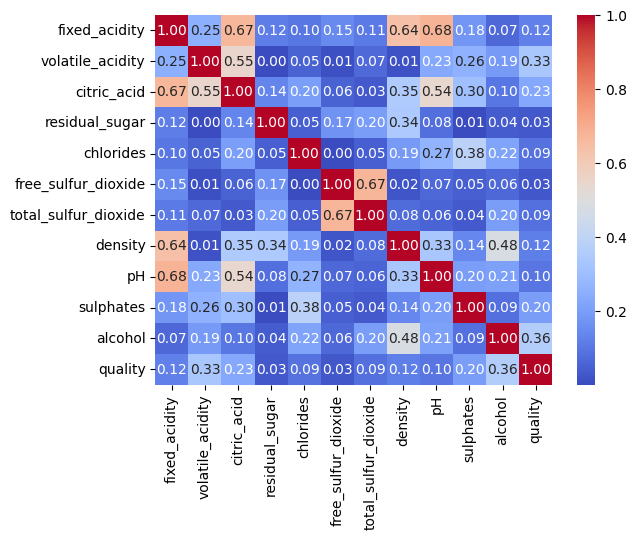

In [32]:
corr_matrix_new = new_data.corr().abs()
sns.heatmap(corr_matrix_new, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

LE FEATURE CHE HANNO UN CORRELAZIONE ALMENO MINIMA (>0.20) <br> SONO SEMPRE : ALCOHOL, SULPHATES, CITRIC_ACID, VOLATILE_ACIDITY

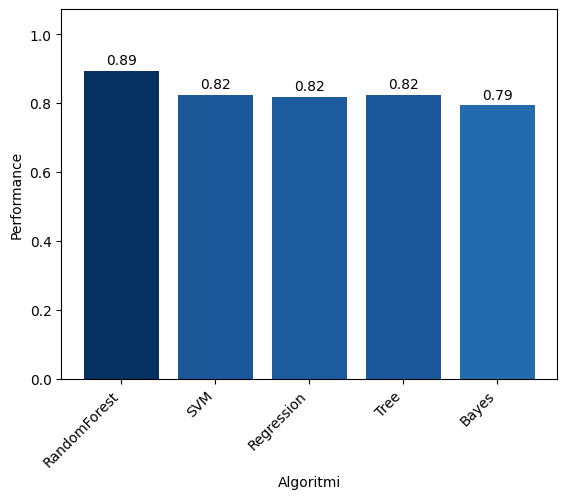

In [33]:
result['New_Data']=classificator(new_data,'quality')
plot_bar_chart_df(result['New_Data'])

In [34]:
data_clean_new=replace_outliers_with_median(new_data)
data_clean_new.shape

(1599, 12)

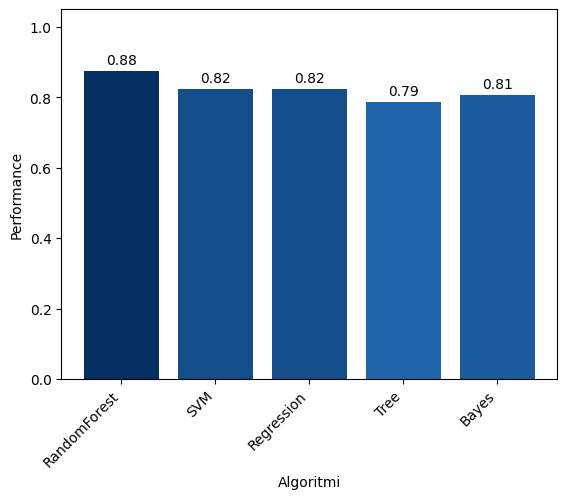

In [35]:
result['New_Data_Clean']=classificator(data_clean_new,'quality')
plot_bar_chart_df(result['New_Data_Clean'])

In [62]:
relevant_new=new_data.drop(columns=no_corr)
relevant_clean_new=replace_outliers_with_median(relevant_new)
relevant_clean_new.shape

(1599, 5)

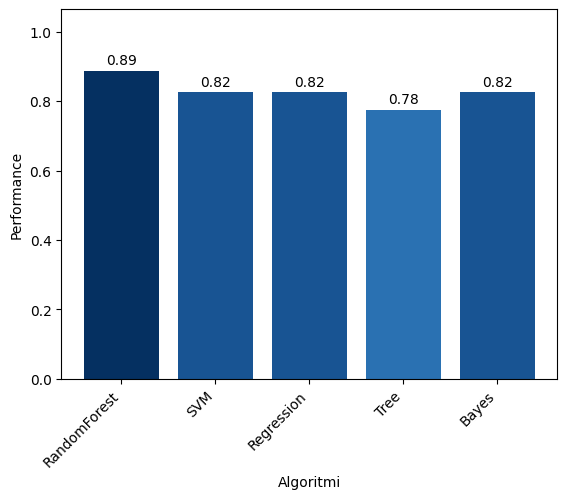

In [37]:
result['New_Relevant']=classificator(relevant_new,'quality')
plot_bar_chart_df(result['New_Relevant'])

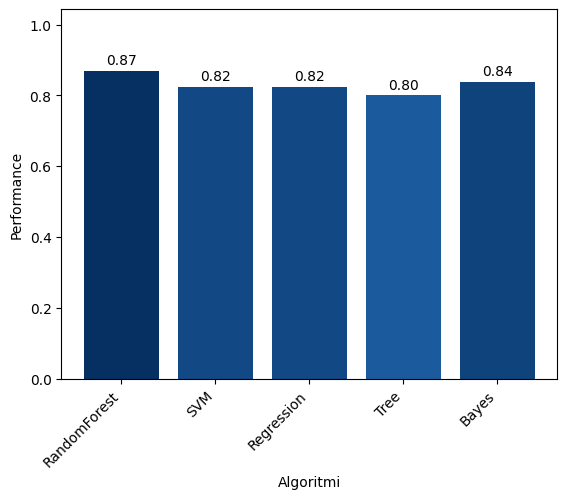

In [38]:
result['New_Relevant_Clean']=classificator(relevant_clean_new,'quality')
plot_bar_chart_df(result['New_Relevant_Clean'])

In [39]:
data_clean_new_remove=remove_outliers(new_data)
data_clean_new_remove.shape

(1188, 12)

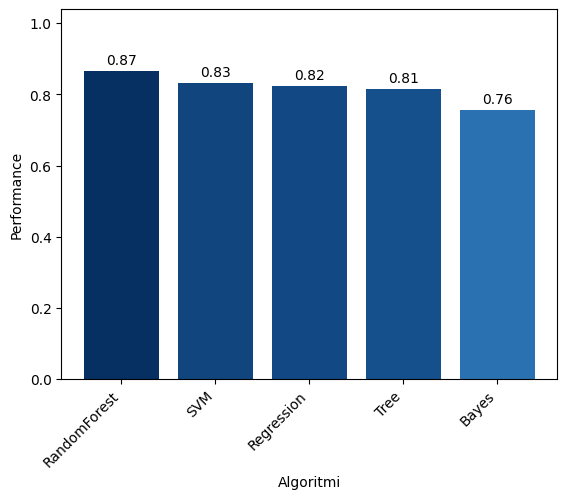

In [40]:
result['New_Data_Remove']=classificator(data_clean_new_remove,'quality')
plot_bar_chart_df(result['New_Data_Remove'])

In [41]:
relevant_new_remove=remove_outliers(relevant_new)
relevant_new_remove.shape

(1496, 5)

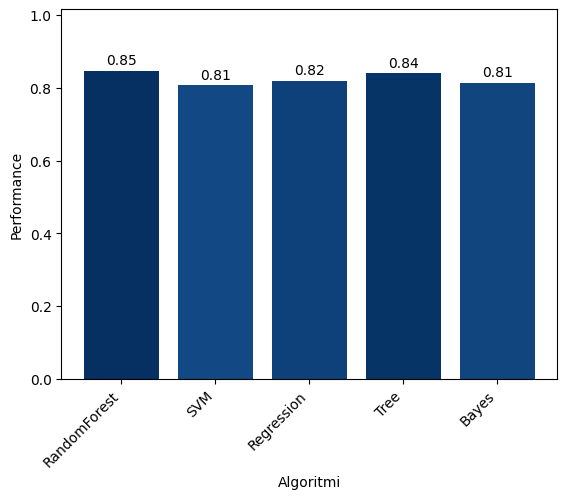

In [42]:
result['New_Relevant_Remove']=classificator(relevant_new_remove,'quality')
plot_bar_chart_df(result['New_Relevant_Remove'])

## RESULT FOR TESTSIZE 10 %

In [43]:
result

,Data,Relevant,Data_Clean,Relevant_Clean,Data_Remove,Relevant_Remove,New_Data,New_Data_Clean,New_Relevant,New_Relevant_Clean,New_Data_Remove,New_Relevant_Remove
RandomForest,0.67500,0.62500,0.6880,0.66200,0.739000,0.720000,0.89400,0.875,0.887,0.869,0.866000,0.847
SVM,0.45000,0.59400,0.4060,0.57500,0.546000,0.520000,0.82500,0.825,0.825,0.825,0.832000,0.807
Regression,0.55625,0.58125,0.5875,0.58125,0.596639,0.566667,0.81875,0.825,0.825,0.825,0.823529,0.820
Tree,0.58100,0.63100,0.5120,0.59400,0.605000,0.647000,0.82500,0.787,0.775,0.800,0.815000,0.840
Bayes,0.53100,0.58800,0.5620,0.58100,0.529000,0.567000,0.79400,0.806,0.825,0.838,0.756000,0.813


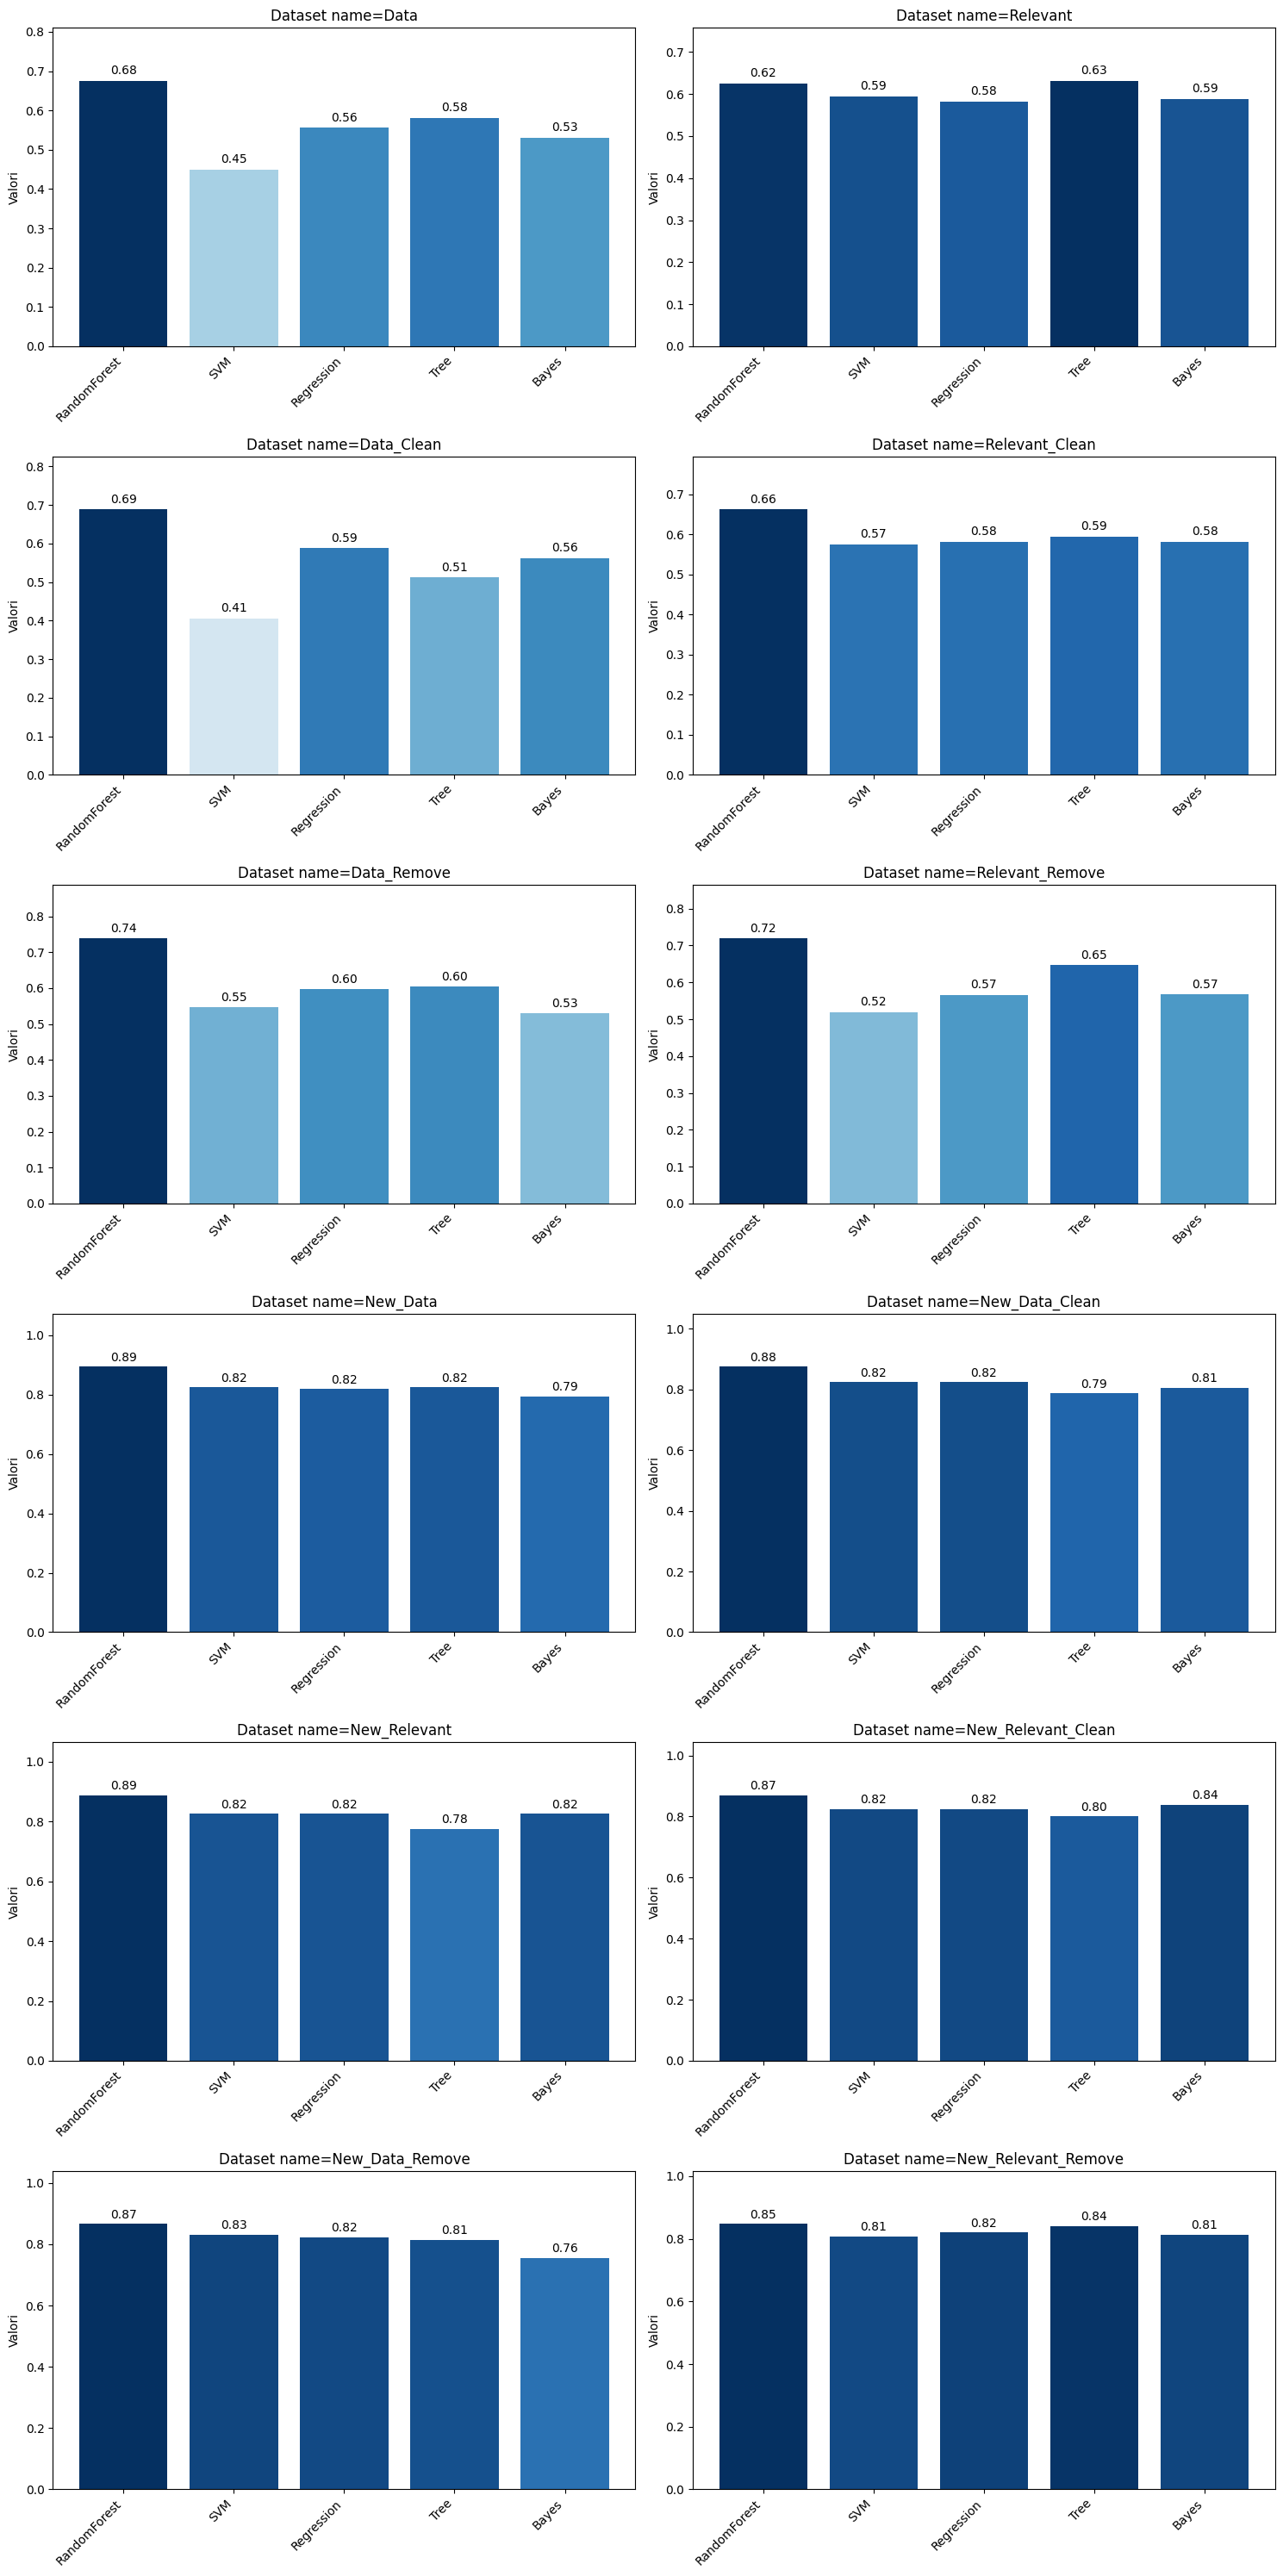

In [69]:
plot_result(result)